In [7]:
# Importação de Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Carregando o dataset

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [9]:
# Codificando a variável categórica independente

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [12]:
# Construção do Modelo

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
# Treinamento

regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
# Previsão nos dados de teste

previsoes = regressor.predict(X_test)

In [20]:
# Resultados

np.set_printoptions(precision=2)
print(np.concatenate((previsoes.reshape(len(previsoes),1), y_test.reshape(len(y_test),1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


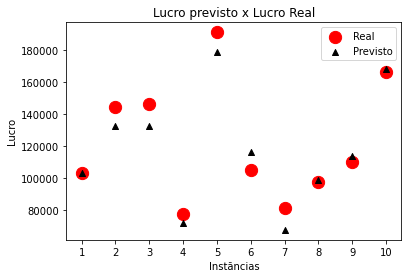

In [44]:
# Visualização dos Resultados

plt.scatter(range(1, len(y_test)+1), y_test, s=150, color='red', label='Real')
plt.scatter(range(1, len(y_test)+1), previsoes, color='black', marker='^', label='Previsto')
plt.title('Lucro previsto x Lucro Real')
plt.xlabel('Instãncias')
plt.xticks(range(1, len(y_test)+1))
plt.ylabel('Lucro')
plt.legend()
plt.show()